**This is a tensor flow textbased classification of Raw tweets (cyberbullying) Using 3 embedding space**

In [ ]:
 !pip install contractions pandas nltk wordcloud numpy tensorflow tensorflow_hub scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.1 MB/s eta 0:00:00


In [ ]:
##This is a set up of all my  packages imported and downloaded for this project to run successfully

In [ ]:
import pandas as pd
import re
import string
from string import punctuation


import contractions
import nltk
nltk.download('punkt')
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.corpus import words
nltk.download('words')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import STOPWORDS
nltk.download("stopwords")
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import io
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


EXPLORING THE DATA SET

In [ ]:
#Load the CSV file
df =pd.read_csv('cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
print(df.shape)

(47692, 2)


In [ ]:
##to get the count of the labels
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

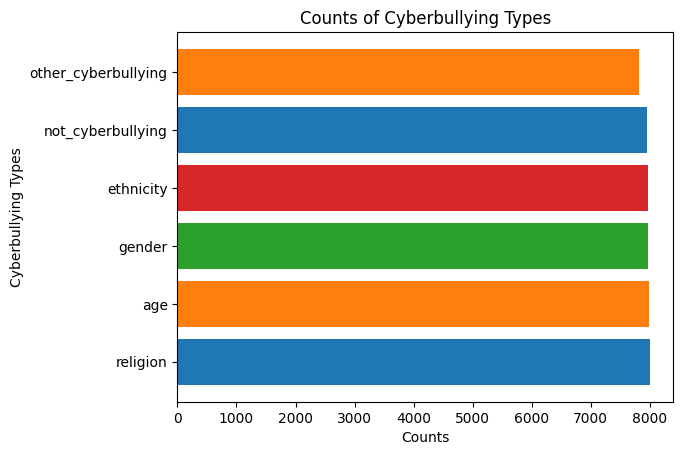

In [ ]:
#To visualize my dataset structure
value_counts = df['cyberbullying_type'].value_counts()

# set color for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# create a horizontal bar chart
plt.barh(value_counts.index, value_counts.values, color=colors)

# set the title and axis labels
plt.title("Counts of Cyberbullying Types")
plt.xlabel("Counts")
plt.ylabel("Cyberbullying Types")

# show the plot
plt.show()

In [ ]:
# Load the set of English words
english_words = set(words.words())

In [ ]:
#Data Preprocessing first stage TextCleaning

In [ ]:
def clean_tweet_text(tweet_text):
    tweet_text=str(tweet_text).lower() ## to convert text to lower case
    tweet_text= " ".join([contractions.fix (expanded_word)for expanded_word in tweet_text.split()])
    tweet_text= re.sub('\[*@?\#.]', '',tweet_text) ##to replace regular expression with space
    tweet_text =re.sub('https?://\S+|www@\...\S+','', tweet_text) ##to remove urls
    tweet_text = re.sub(r'\w*#\w*', '', tweet_text) #to remove hastags
    # tweet_text= re.sub('<.*?>+#', '',tweet_text) # to remove html tags
    # tweet_text = re.sub(r'@[A-Za-z0-9 rt p lol ..._]+', '', tweet_text)
    tweet_text= re.sub('[%s]' %  re.escape(punctuation), '', tweet_text) #to remove punctuations
    tweet_text = re.sub('\n', '', tweet_text) #to remove occurence of new lines
    tweet_text= re.sub('\w*\d\w*', '', tweet_text) # to remove digits
    tweet_text = re.sub('\W',' ', tweet_text)
    # # Remove non-English words
    # tweet_text = " ".join([word for word in tweet_text.split() if word.lower() in english_words])

    return tweet_text

In [ ]:
##application of the cleaned text

df['clean_tweet_text']= df['tweet_text'].apply(lambda  tweet_text :clean_tweet_text(tweet_text))


In [ ]:
df['tweet_text'][0]

'In other words #katandandre, your food was crapilicious! #mkr'

In [ ]:
df['clean_tweet_text'][0]

'in other words  your food was crapilicious '

In [ ]:
df.head(5)

,tweet_text,cyberbullying_type,clean_tweet_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in other words your food was crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is so white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks a classy whore or more red velv...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks for the heads up but not...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish this is an isis account pretendi...


In [ ]:
#tokenize using word tokenizer
df['tweet_list'] = df['clean_tweet_text'].apply(word_tokenize)
df.head()

,tweet_text,cyberbullying_type,clean_tweet_text,tweet_list
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in other words your food was crapilicious,"[in, other, words, your, food, was, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is so white,"[why, is, so, white]"
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks a classy whore or more red velv...,"[xochitlsuckkks, a, classy, whore, or, more, r..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks for the heads up but not...,"[jasongio, meh, p, thanks, for, the, heads, up..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish this is an isis account pretendi...,"[rudhoeenglish, this, is, an, isis, account, p..."


In [ ]:
##to remove stop words

custom_stopwords = ['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 'lol', 's']
stop_words = set(stopwords.words('english')).union(set(custom_stopwords))




In [ ]:
def remove_stop_words(word_list):
    tweet_list_without_sw = [word for word in word_list if word.casefold() not in stop_words]
    return tweet_list_without_sw

In [ ]:
##applying the stopword to my dataset
df['tweet_list_without_sw'] = df['tweet_list'].apply(remove_stop_words)

In [ ]:
#to view the output
df.head() #print the first 5 rows

,tweet_text,cyberbullying_type,clean_tweet_text,tweet_list,tweet_list_without_sw
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in other words your food was crapilicious,"[in, other, words, your, food, was, crapilicious]","[words, food, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is so white,"[why, is, so, white]",[white]
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks a classy whore or more red velv...,"[xochitlsuckkks, a, classy, whore, or, more, r...","[xochitlsuckkks, classy, whore, red, velvet, c..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks for the heads up but not...,"[jasongio, meh, p, thanks, for, the, heads, up...","[jasongio, meh, p, thanks, heads, concerned, a..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish this is an isis account pretendi...,"[rudhoeenglish, this, is, an, isis, account, p...","[rudhoeenglish, isis, account, pretending, kur..."


In [ ]:
##to create world cloud

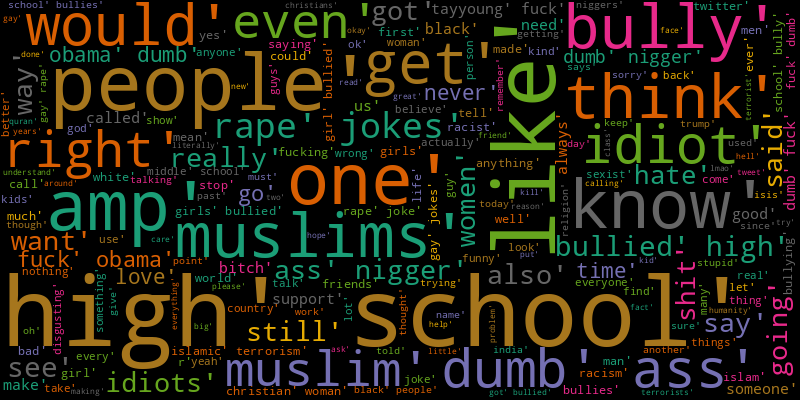

In [ ]:
long_string = ','.join([str(item) for item in df['tweet_list_without_sw'].values])

wordcloud = WordCloud(background_color="black",colormap="Dark2", max_words=200,height=400, width=800,contour_width=50, contour_color='black')


wordcloud.generate(long_string)

wordcloud.to_image()


In [ ]:
#to get the common word used in cyberbullying
top = Counter([item for sublist in df['tweet_list_without_sw'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp = temp.iloc[1:,:]
temp.columns=['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,like,5865
2,fuck,5804
3,people,5414
4,dumb,5334
5,high,5099
6,bullied,4664
7,nigger,4342
8,rape,4224
9,gay,3971


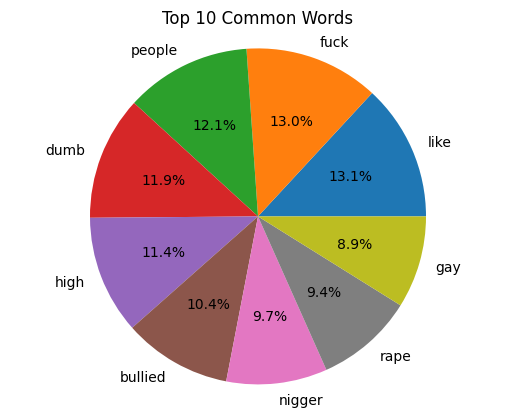

In [ ]:
# Create a pie chart
plt.pie(temp['count'], labels=temp['Common_words'], autopct='%1.1f%%')

plt.title('Top 10 Common Words')
plt.axis('equal')

# Show the pie chart
plt.show()


In [ ]:
# to lemmatization
lemmatizer = WordNetLemmatizer()
df['tweet_list_without_sw'] = df['tweet_list_without_sw'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

,tweet_text,cyberbullying_type,clean_tweet_text,tweet_list,tweet_list_without_sw
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in other words your food was crapilicious,"[in, other, words, your, food, was, crapilicious]","[word, food, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is so white,"[why, is, so, white]",[white]
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks a classy whore or more red velv...,"[xochitlsuckkks, a, classy, whore, or, more, r...","[xochitlsuckkks, classy, whore, red, velvet, c..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks for the heads up but not...,"[jasongio, meh, p, thanks, for, the, heads, up...","[jasongio, meh, p, thanks, head, concerned, an..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish this is an isis account pretendi...,"[rudhoeenglish, this, is, an, isis, account, p...","[rudhoeenglish, isi, account, pretending, kurd..."


In [ ]:
##final preprocessing

In [ ]:
df['final_tweet'] = df['tweet_list_without_sw'].apply(lambda x:' '.join(x))
df.head()

,tweet_text,cyberbullying_type,clean_tweet_text,tweet_list,tweet_list_without_sw,final_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in other words your food was crapilicious,"[in, other, words, your, food, was, crapilicious]","[word, food, crapilicious]",word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is so white,"[why, is, so, white]",[white],white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks a classy whore or more red velv...,"[xochitlsuckkks, a, classy, whore, or, more, r...","[xochitlsuckkks, classy, whore, red, velvet, c...",xochitlsuckkks classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks for the heads up but not...,"[jasongio, meh, p, thanks, for, the, heads, up...","[jasongio, meh, p, thanks, head, concerned, an...",jasongio meh p thanks head concerned another a...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish this is an isis account pretendi...,"[rudhoeenglish, this, is, an, isis, account, p...","[rudhoeenglish, isi, account, pretending, kurd...",rudhoeenglish isi account pretending kurdish a...


In [ ]:
##get total number of label

In [ ]:
len(set(df['cyberbullying_type']))

6

In [ ]:
##Encoding my label that is in strings to integer using label encoder

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['cyberbullying_type'] =label_encoder.fit_transform(df['cyberbullying_type'])

In [ ]:
df['cyberbullying_type'].value_counts()

5    7998
0    7992
2    7973
1    7961
3    7945
4    7823
Name: cyberbullying_type, dtype: int64

**DATA** **SPLITTING**

In [ ]:
#Converting my label into numpy array so that my model can read it
x=np.array(df['final_tweet'])
y=np.array(df['cyberbullying_type'])


In [ ]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)
x_test, x_val,y_test,y_val =train_test_split(x_test,y_test,test_size =0.2,random_state=42)


In [ ]:
print("Training entries: {}, test entries: {},Val entries: {}".format(len(x_train), len(x_test), len(x_val)))

Training entries: 38153, test entries: 7631,Val entries: 1908


In [ ]:
#view samples of the xtrain
x_train[:10]

array(['avatastic freebsdgirl also anyone never written x cjavaltinsert language assignment always ret',
       'questionnier dis joke gay rape babe rape',
       'davidcleevely raspberry pi foundation looking new ceo one exciting job charity sector',
       'stolen reply ill give one love pinned love seeing tl ilysm want friend stalked acc consider one fave moot sweet would anything first time see',
       'people navarre fucking dumb never anything posted social medias saying nigger please fuck',
       'always acted like victim bullied many people gradehigh school never got trouble always act like hot shit reality weird horse girl one like',
       'ashelia girl princess name friend roleplayed princess game bf got mad',
       'get school already outdated',
       'smcadman itsmenanice yeah good go assuming abuse happens around gg case',
       'smell delusion air feel type way make true stated gay people minority yes instance many others put pedestal show made joke suicide underage

   TRAINING MODELS`

In [ ]:
#using the first model

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(x_train)

<tf.Tensor: shape=(38153, 50), dtype=float32, numpy=
array([[ 0.47546986, -0.14231533, -0.2748517 , ..., -0.12904356,
         0.3502723 ,  0.24259526],
       [ 0.16399367, -0.02989793, -0.06891318, ...,  0.09811608,
         0.31973577,  0.01247253],
       [ 0.27653873, -0.2638403 ,  0.05813019, ...,  0.03928989,
         0.36253697,  0.36763012],
       ...,
       [ 0.69839805, -0.36394235, -0.5589402 , ..., -0.15092841,
         0.5496209 , -0.21287173],
       [ 0.3120279 , -0.15130116, -0.179482  , ...,  0.10130911,
         0.3085241 , -0.17714499],
       [ 0.2552726 , -0.10585926,  0.10952587, ...,  0.25280884,
         0.16719796,  0.21141107]], dtype=float32)>

In [ ]:
##build the model

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 32)                1632      
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 48,192,430
Trainable params: 48,192,430
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics =[tf.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [ ]:
#train the model
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
150/150 [==============================] - 85s 560ms/step - loss: 1.1934 - accuracy: 0.5922 - val_loss: 0.7123 - val_accuracy: 0.7479
Epoch 2/10
150/150 [==============================] - 82s 548ms/step - loss: 0.5245 - accuracy: 0.8066 - val_loss: 0.5254 - val_accuracy: 0.7904
Epoch 3/10
150/150 [==============================] - 81s 540ms/step - loss: 0.3724 - accuracy: 0.8570 - val_loss: 0.4919 - val_accuracy: 0.8035
Epoch 4/10
150/150 [==============================] - 98s 655ms/step - loss: 0.2898 - accuracy: 0.8885 - val_loss: 0.5016 - val_accuracy: 0.8014
Epoch 5/10
150/150 [==============================] - 90s 602ms/step - loss: 0.2345 - accuracy: 0.9084 - val_loss: 0.5312 - val_accuracy: 0.7951
Epoch 6/10
150/150 [==============================] - 92s 611ms/step - loss: 0.1959 - accuracy: 0.9218 - val_loss: 0.5672 - val_accuracy: 0.7877
Epoch 7/10
150/150 [==============================] - 91s 608ms/step - loss: 0.1682 - accuracy: 0.9316 - val_loss: 0.6072 - val_ac

In [ ]:
results = model.evaluate(x_test,y_test)

print(results)

239/239 [==============================] - 28s 118ms/step - loss: 0.7010 - accuracy: 0.7817
[0.7009514570236206, 0.7816799879074097]


In [ ]:
#to get the result prediction
results_pred = model.predict(x_test)
classes_x=np.argmax(results_pred ,axis=1)


239/239 [==============================] - 21s 88ms/step


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#parameters for the graph
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


Text(0.5, 1.0, 'Training and Validation Loss')

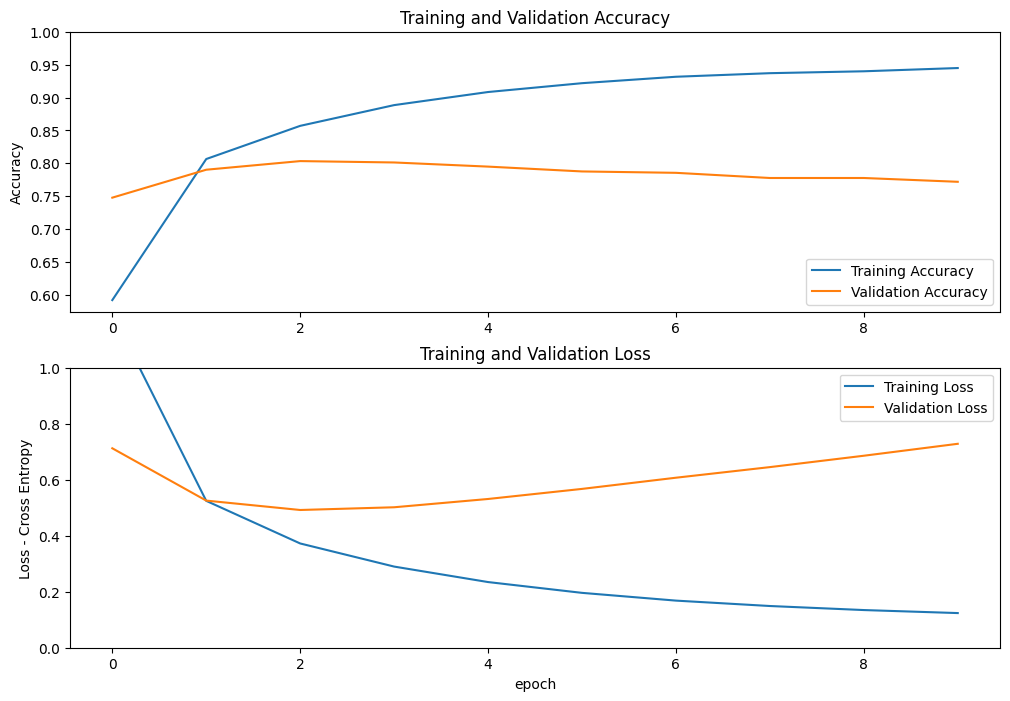

In [ ]:
#to plot the graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# -- Plot training and validation loss and accuracy --
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss - Cross Entropy')
plt.xlabel('epoch')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')



In [ ]:
#Using the 2nd model for training nnlm-en-dim128-with-normalization/2"

In [ ]:
 model2 = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
 hub_layer = hub.KerasLayer(model2, input_shape=[], dtype=tf.string, trainable=True)
 hub_layer(x_train)

<tf.Tensor: shape=(38153, 128), dtype=float32, numpy=
array([[ 0.01358482,  0.02278784, -0.07462303, ...,  0.01506333,
        -0.04030429,  0.04255888],
       [-0.20472589,  0.3276029 ,  0.21757841, ..., -0.12610865,
         0.14429101, -0.04346241],
       [ 0.06849489,  0.11747514,  0.146024  , ...,  0.05555329,
         0.17756353, -0.15915701],
       ...,
       [ 0.15866704,  0.20776728,  0.11150284, ..., -0.21410151,
         0.43853256,  0.13185348],
       [-0.02533848,  0.3412173 ,  0.02890821, ...,  0.03386327,
         0.19922455, -0.01652393],
       [ 0.11513568,  0.15583162, -0.0171693 , ..., -0.04172329,
         0.19046   , -0.00245615]], dtype=float32)>

In [ ]:
#build the model

model2 = tf.keras.Sequential()
model2.add(hub_layer)
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(6, activation='softmax'))
model2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 124,647,014
Trainable params: 124,647,014
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics =[tf.metrics.SparseCategoricalAccuracy(name='accuracy')])



In [ ]:
from keras.api._v2.keras import callbacks

history2 = model2.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    verbose=1)


Epoch 1/5
150/150 [==============================] - 233s 2s/step - loss: 1.0019 - accuracy: 0.6725 - val_loss: 0.5604 - val_accuracy: 0.7909
Epoch 2/5
150/150 [==============================] - 230s 2s/step - loss: 0.4052 - accuracy: 0.8491 - val_loss: 0.4797 - val_accuracy: 0.8103
Epoch 3/5
150/150 [==============================] - 252s 2s/step - loss: 0.2840 - accuracy: 0.8916 - val_loss: 0.4995 - val_accuracy: 0.8061
Epoch 4/5
 60/150 [===========>..................] - ETA: 2:22 - loss: 0.2100 - accuracy: 0.9221

In [ ]:
results2 = model2.evaluate(x_test,y_test)

print(results2)

In [ ]:
results_pred2= model2.predict(x_test)
classes_x2=np.argmax(results_pred2 ,axis=1)


In [ ]:
history_dict2 = history2.history
history_dict2.keys()

In [ ]:
acc2= history_dict2['accuracy']
val_acc2 = history_dict2['val_accuracy']
loss2= history_dict2['loss']
val_loss2= history_dict2['val_loss']

epochs2 = range(1, len(acc) + 1)

In [ ]:
# to plot the graph
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2= history2.history['val_loss']

# -- Plot training and validation loss and2 accuracy --
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.figure(figsize=(12,8))

plt.subplot(2, 1, 1)
plt.plot(acc2, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss - Cross Entropy')
plt.xlabel('epoch2')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')



In [ ]:
#Using the third model for training nnlm-en-dim50-with-normalization/2


In [ ]:
model3 = "https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2"
hub_layer = hub.KerasLayer(model3, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(x_train)

In [ ]:
model3 = tf.keras.Sequential()
model3.add(hub_layer)
model3.add(tf.keras.layers.Dense(32, activation='relu'))
model3.add(tf.keras.layers.Dense(6, activation='softmax'))


model3.summary()

In [ ]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics =[tf.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [ ]:
history3 = model3.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    verbose=1)

In [ ]:
results3 = model3.evaluate(x_test,y_test)

print(results3)

In [ ]:
results_pred3 = model3.predict(x_test)
classes_x=np.argmax(results_pred ,axis=1)

In [ ]:
history_dict3 = history3.history
history_dict.keys()

In [ ]:
acc3 = history_dict3['accuracy']
val_acc3 = history_dict3['val_accuracy']
loss3 = history_dict3['loss']
val_loss3 = history_dict3['val_loss']

epochs3 = range(1, len(acc) + 1)

In [ ]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

loss3= history3.history['loss']
val_loss3 = history.history['val_loss']

# -- Plot training and validation loss and accuracy --
acc3 = history3.history['accuracy']
val_acc3 = history.history['val_accuracy']

loss3 = history3.history['loss']
val_loss3= history3.history['val_loss']

plt.figure(figsize=(12,8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss - Cross Entropy')
plt.xlabel('epoch')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')



RESULT METRICS

In [ ]:
Metrics for Model1
from sklearn.metrics import confusion_matrix, precision_score

# get the predicted classes for model1 and confusion matrix
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

In [ ]:
# calculate precision score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision Score:", precision)

In [ ]:
from sklearn.metrics import confusion_matrix

# get the predicted classes for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# calculate true positives and false positives for each class
for i in range(cm.shape[0]):
    tp = cm[i, i]
    fp = sum(cm[:, i]) - tp
    print(f"Class {i}: TP = {tp}, FP = {fp}")

In [ ]:
import seaborn as sns

# get the predicted classes for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix 1")
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# get the predicted classes for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("F1 score:", f1)


In [ ]:
#Metrics for model 2

In [ ]:
# get the predicted classes for model2 and confusion matrix
y_pred2 = model2.predict(x_test)
y_pred2 = np.argmax(y_pred2, axis=1)
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", cm2)

In [ ]:
# calculate confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# calculate true positives and false positives for each class
for i in range(cm2.shape[0]):
    tp = cm2[i, i]
    fp = sum(cm2[:, i]) - tp
    print(f"Class {i}: TP = {tp}, FP = {fp}")

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)

# create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Reds", fmt='g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix 2")
plt.show()

In [ ]:
# get the predicted classes for the test set
y_pred2 = model2.predict(x_test)
y_pred2 = np.argmax(y_pred2, axis=1)

# calculate F1 score
f1 = f1_score(y_test, y_pred2, average='weighted')

print("F1 score:", f1)

In [ ]:
# calculate precision score for model2
precision2 = precision_score(y_test, y_pred2, average='weighted')
print("Precision Score:", precision2)

In [ ]:
#Metrics for model3

In [ ]:
# get the predicted classes for model3 and confusion matrix
y_pred3 = model3.predict(x_test)
y_pred3 = np.argmax(y_pred3, axis=1)
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:\n", cm3)

In [ ]:

# calculate confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)

# calculate true positives and false positives for each class
for i in range(cm3.shape[0]):
    tp = cm3[i, i]
    fp = sum(cm3[:, i]) - tp
    print(f"Class {i}: TP = {tp}, FP = {fp}")

In [ ]:
cm3 = confusion_matrix(y_test, y_pred2)

# create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="GnBu", fmt='g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix 3")
plt.show()

In [ ]:
# calculate precision score for model3
precision3 = precision_score(y_test, y_pred3, average='weighted')
print("Precision Score:", precision3)

In [ ]:
# calculate F1 score for model 3
f1 = f1_score(y_test, y_pred3, average='weighted')

print("F1 score:", f1)